In [49]:
suppressMessages(library(pheatmap))

In [84]:
# Read the data
plot_df <- read.csv("/cellar/users/aklie/projects/igvf/topic_grn_links/grn_inference/celloracle/bin/igvf_b01_LeftCortex/plot_df.csv")

# Extract methods and data types from column names
methods <- sapply(strsplit(colnames(plot_df), "_"), "[", 1)
data_types <- sapply(strsplit(colnames(plot_df), "_"), "[", 2)
version <- sapply(strsplit(colnames(plot_df), "_"), "[", 3)

# Column annotations for the heatmap
ann_col <- data.frame(Methods = methods, DataTypes = data_types, Version = version)
rownames(ann_col) <- colnames(plot_df)

# Replace NA Version with "v2"
ann_col$Version[is.na(ann_col$Version)] <- "v2"

In [85]:
plot_df  <- plot_df - rowMeans(plot_df)
head(plot_df)

,aracne_B6J,aracne_B6J_v1,aracne_CASTJ,aracne_CASTJ_v1,aracne_both,celloracle_B6J,celloracle_B6J_v1,celloracle_CASTJ,celloracle_CASTJ_v1,celloracle_both,⋯,grnboost2_CASTJ_v1,grnboost2_both,hdwgcna_B6J,hdwgcna_CASTJ,hdwgcna_both,scenic_B6J,scenic_B6J_v1,scenic_CASTJ,scenic_CASTJ_v1,scenic_both
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.4137931,-1.4137931,39.5862069,-1.413793,-1.4137931,-1.4137931,-1.4137931,-1.4137931,-1.4137931,-1.4137931,⋯,-1.4137931,-1.4137931,-1.4137931,-1.4137931,-1.4137931,-1.4137931,-1.4137931,-1.4137931,-1.4137931,-1.4137931
2,44.4137931,-1.5862069,-1.5862069,-1.586207,-1.5862069,-1.5862069,-1.5862069,-1.5862069,-1.5862069,-1.5862069,⋯,-1.5862069,-1.5862069,-1.5862069,-1.5862069,-1.5862069,-1.5862069,-1.5862069,-1.5862069,-1.5862069,-1.5862069
3,-4.7586207,-4.7586207,-4.7586207,-4.758621,-4.7586207,-4.7586207,-4.7586207,-4.7586207,-4.7586207,-4.7586207,⋯,-4.7586207,-4.7586207,-4.7586207,-4.7586207,133.2413793,-4.7586207,-4.7586207,-4.7586207,-4.7586207,-4.7586207
4,-1.4137931,-1.4137931,39.5862069,-1.413793,-1.4137931,-1.4137931,-1.4137931,-1.4137931,-1.4137931,-1.4137931,⋯,-1.4137931,-1.4137931,-1.4137931,-1.4137931,-1.4137931,-1.4137931,-1.4137931,-1.4137931,-1.4137931,-1.4137931
5,-2.4137931,-2.4137931,-2.4137931,-2.413793,-2.4137931,-2.4137931,-2.4137931,-2.4137931,-2.4137931,-2.4137931,⋯,-2.4137931,-2.4137931,24.5862069,40.5862069,-2.4137931,-2.4137931,-2.4137931,-2.4137931,-2.4137931,-2.4137931
6,-0.1034483,-0.1034483,-0.1034483,2.896552,-0.1034483,-0.1034483,-0.1034483,-0.1034483,-0.1034483,-0.1034483,⋯,-0.1034483,-0.1034483,-0.1034483,-0.1034483,-0.1034483,-0.1034483,-0.1034483,-0.1034483,-0.1034483,-0.1034483


In [86]:
head(ann_col)

,Methods,DataTypes,Version
,<chr>,<chr>,<chr>
aracne_B6J,aracne,B6J,v2
aracne_B6J_v1,aracne,B6J,v1
aracne_CASTJ,aracne,CASTJ,v2
aracne_CASTJ_v1,aracne,CASTJ,v1
aracne_both,aracne,both,v2
celloracle_B6J,celloracle,B6J,v2


In [87]:
# Plotting colors
my.breaks <- c(seq(-5, -0.01, by=0.01), seq(0.01, 10, by=0.01))
my.colors <- c(colorRampPalette(colors = c("blue", "white"))(length(my.breaks)/2),
               colorRampPalette(colors = c("white", "red"))(length(my.breaks)/2))

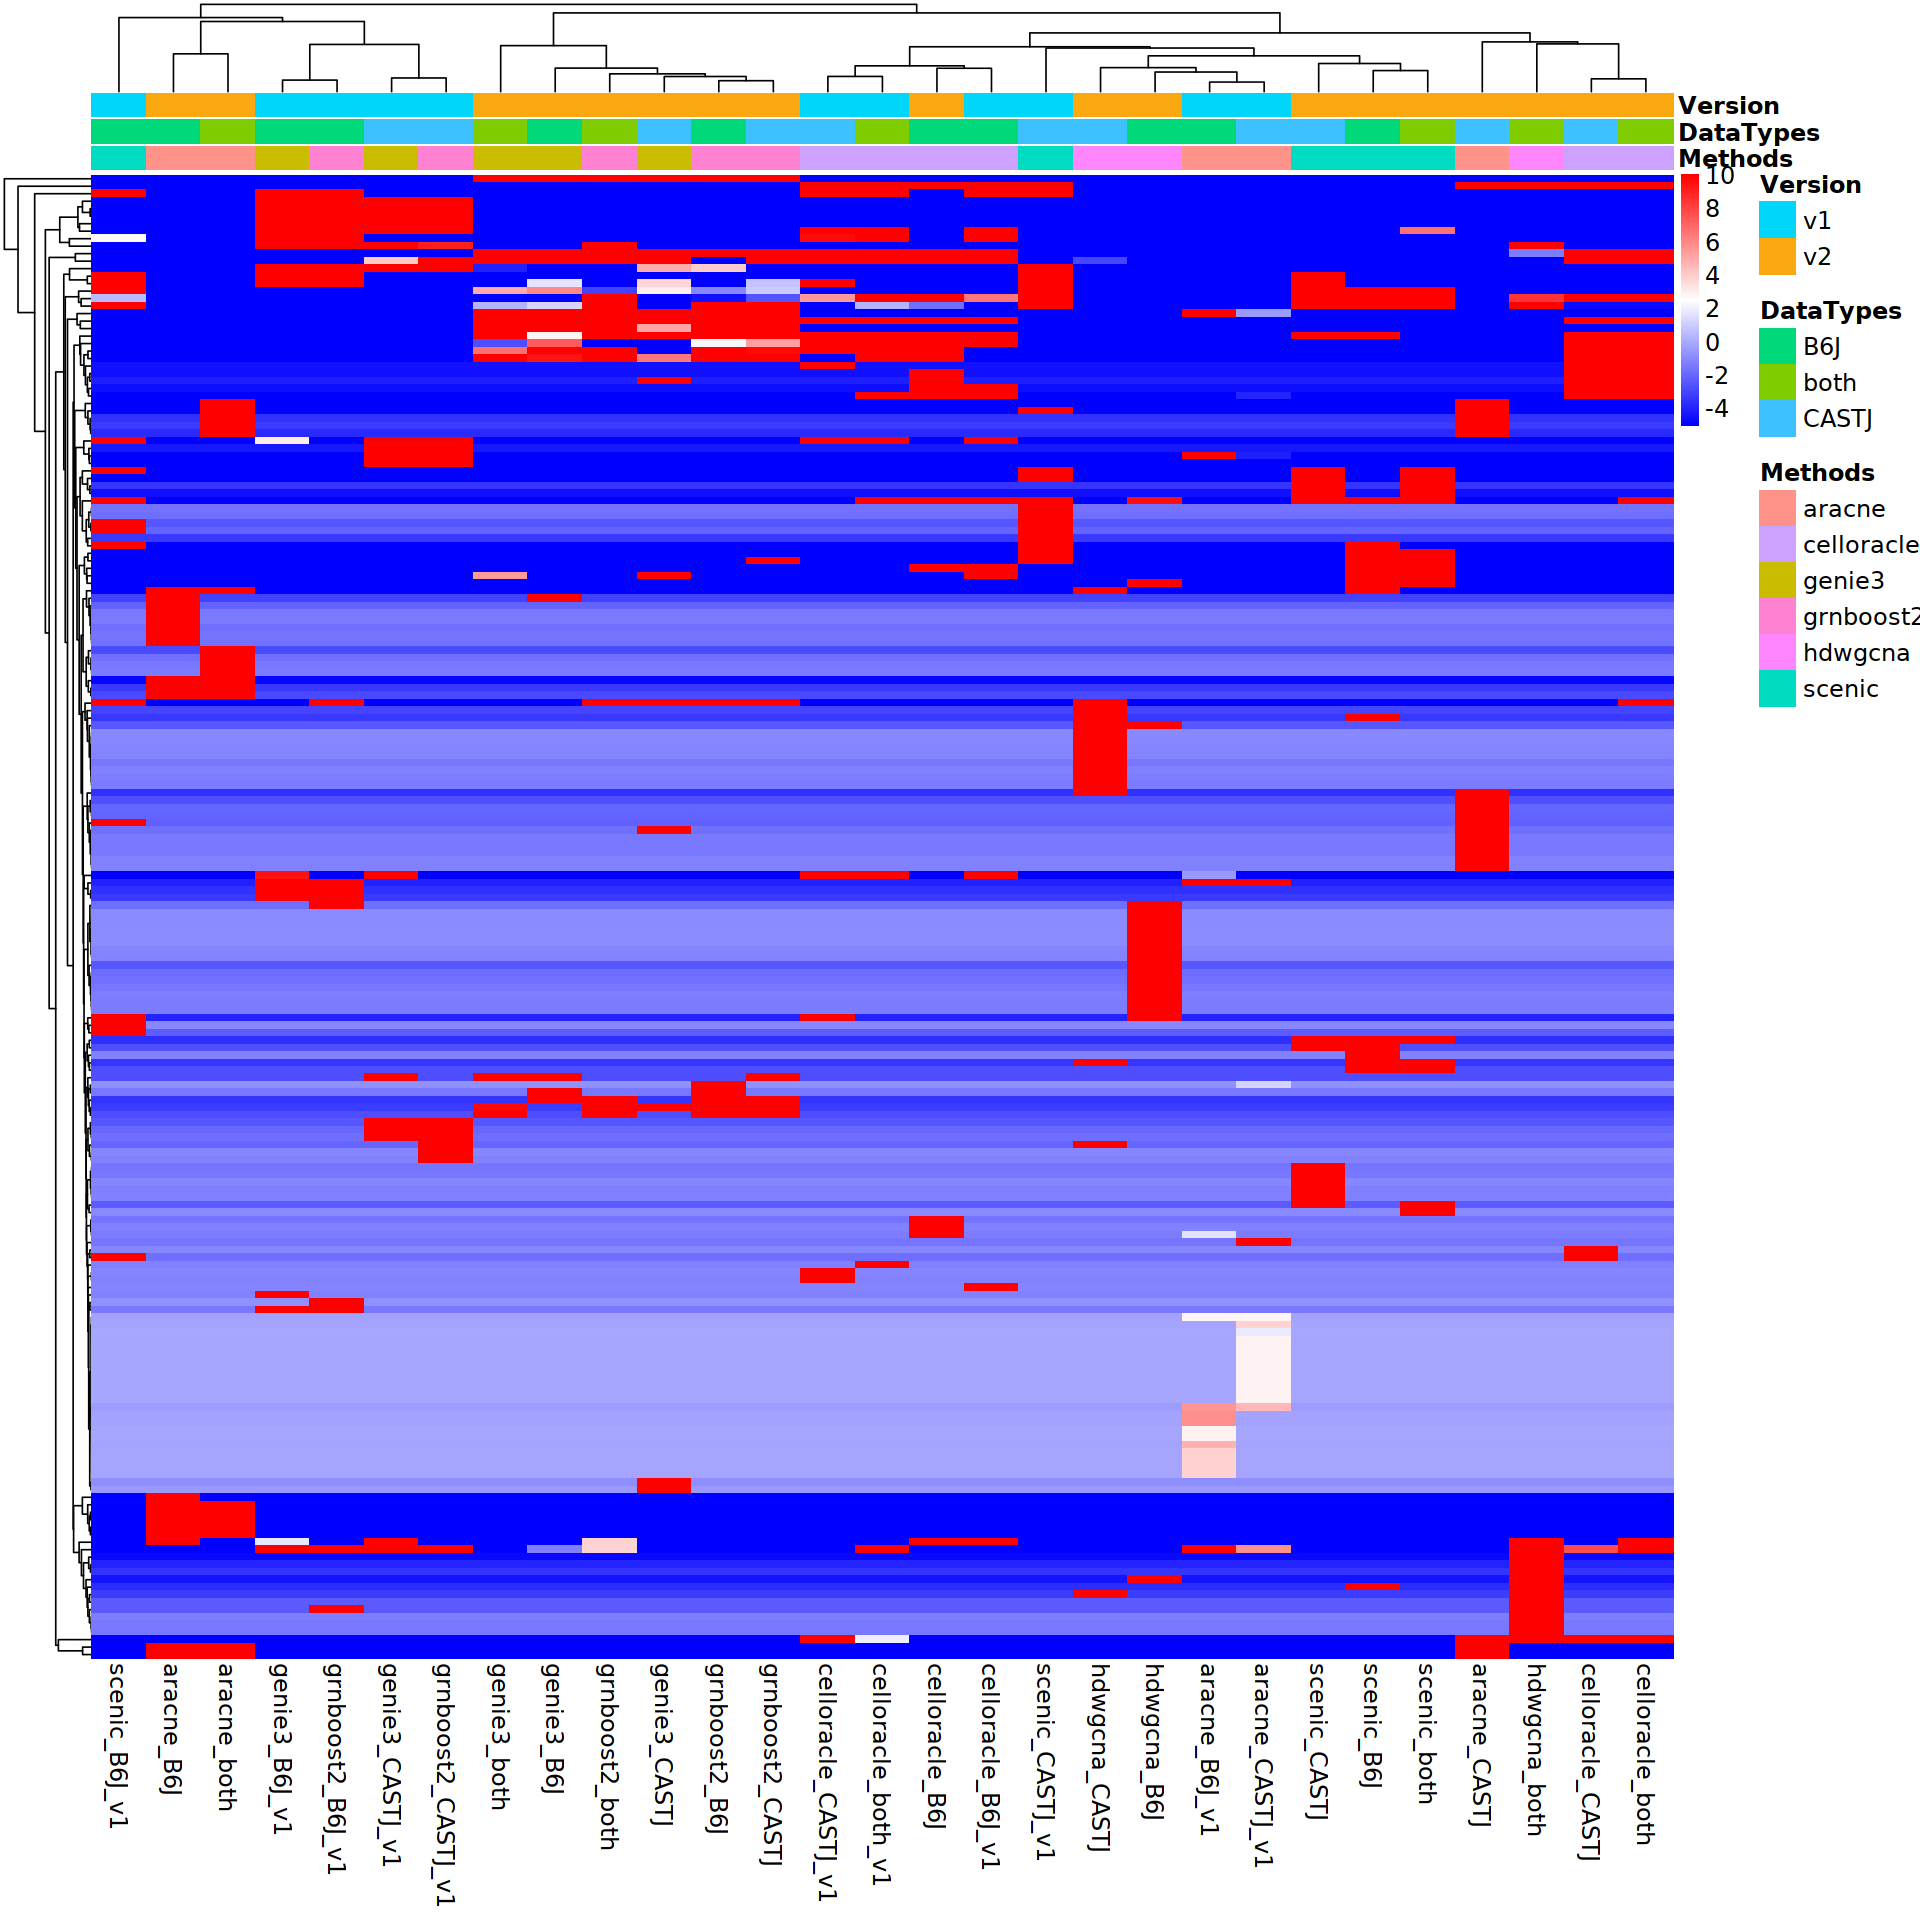

In [88]:
options(repr.plot.width = 16, repr.plot.height = 16)
pheatmap(
    plot_df, 
    fontsize=14,
    cluster_rows=TRUE, 
    show_rownames=FALSE, 
    cluster_cols=TRUE,
    annotation_col=ann_col,
    color=my.colors, 
    breaks=my.breaks
)

In [92]:
# Sort ann_col by "Method" then "DataType" then "Version" in R
ord_ann_col <- ann_col[order(ann_col$Method, ann_col$DataType, ann_col$Version), ]

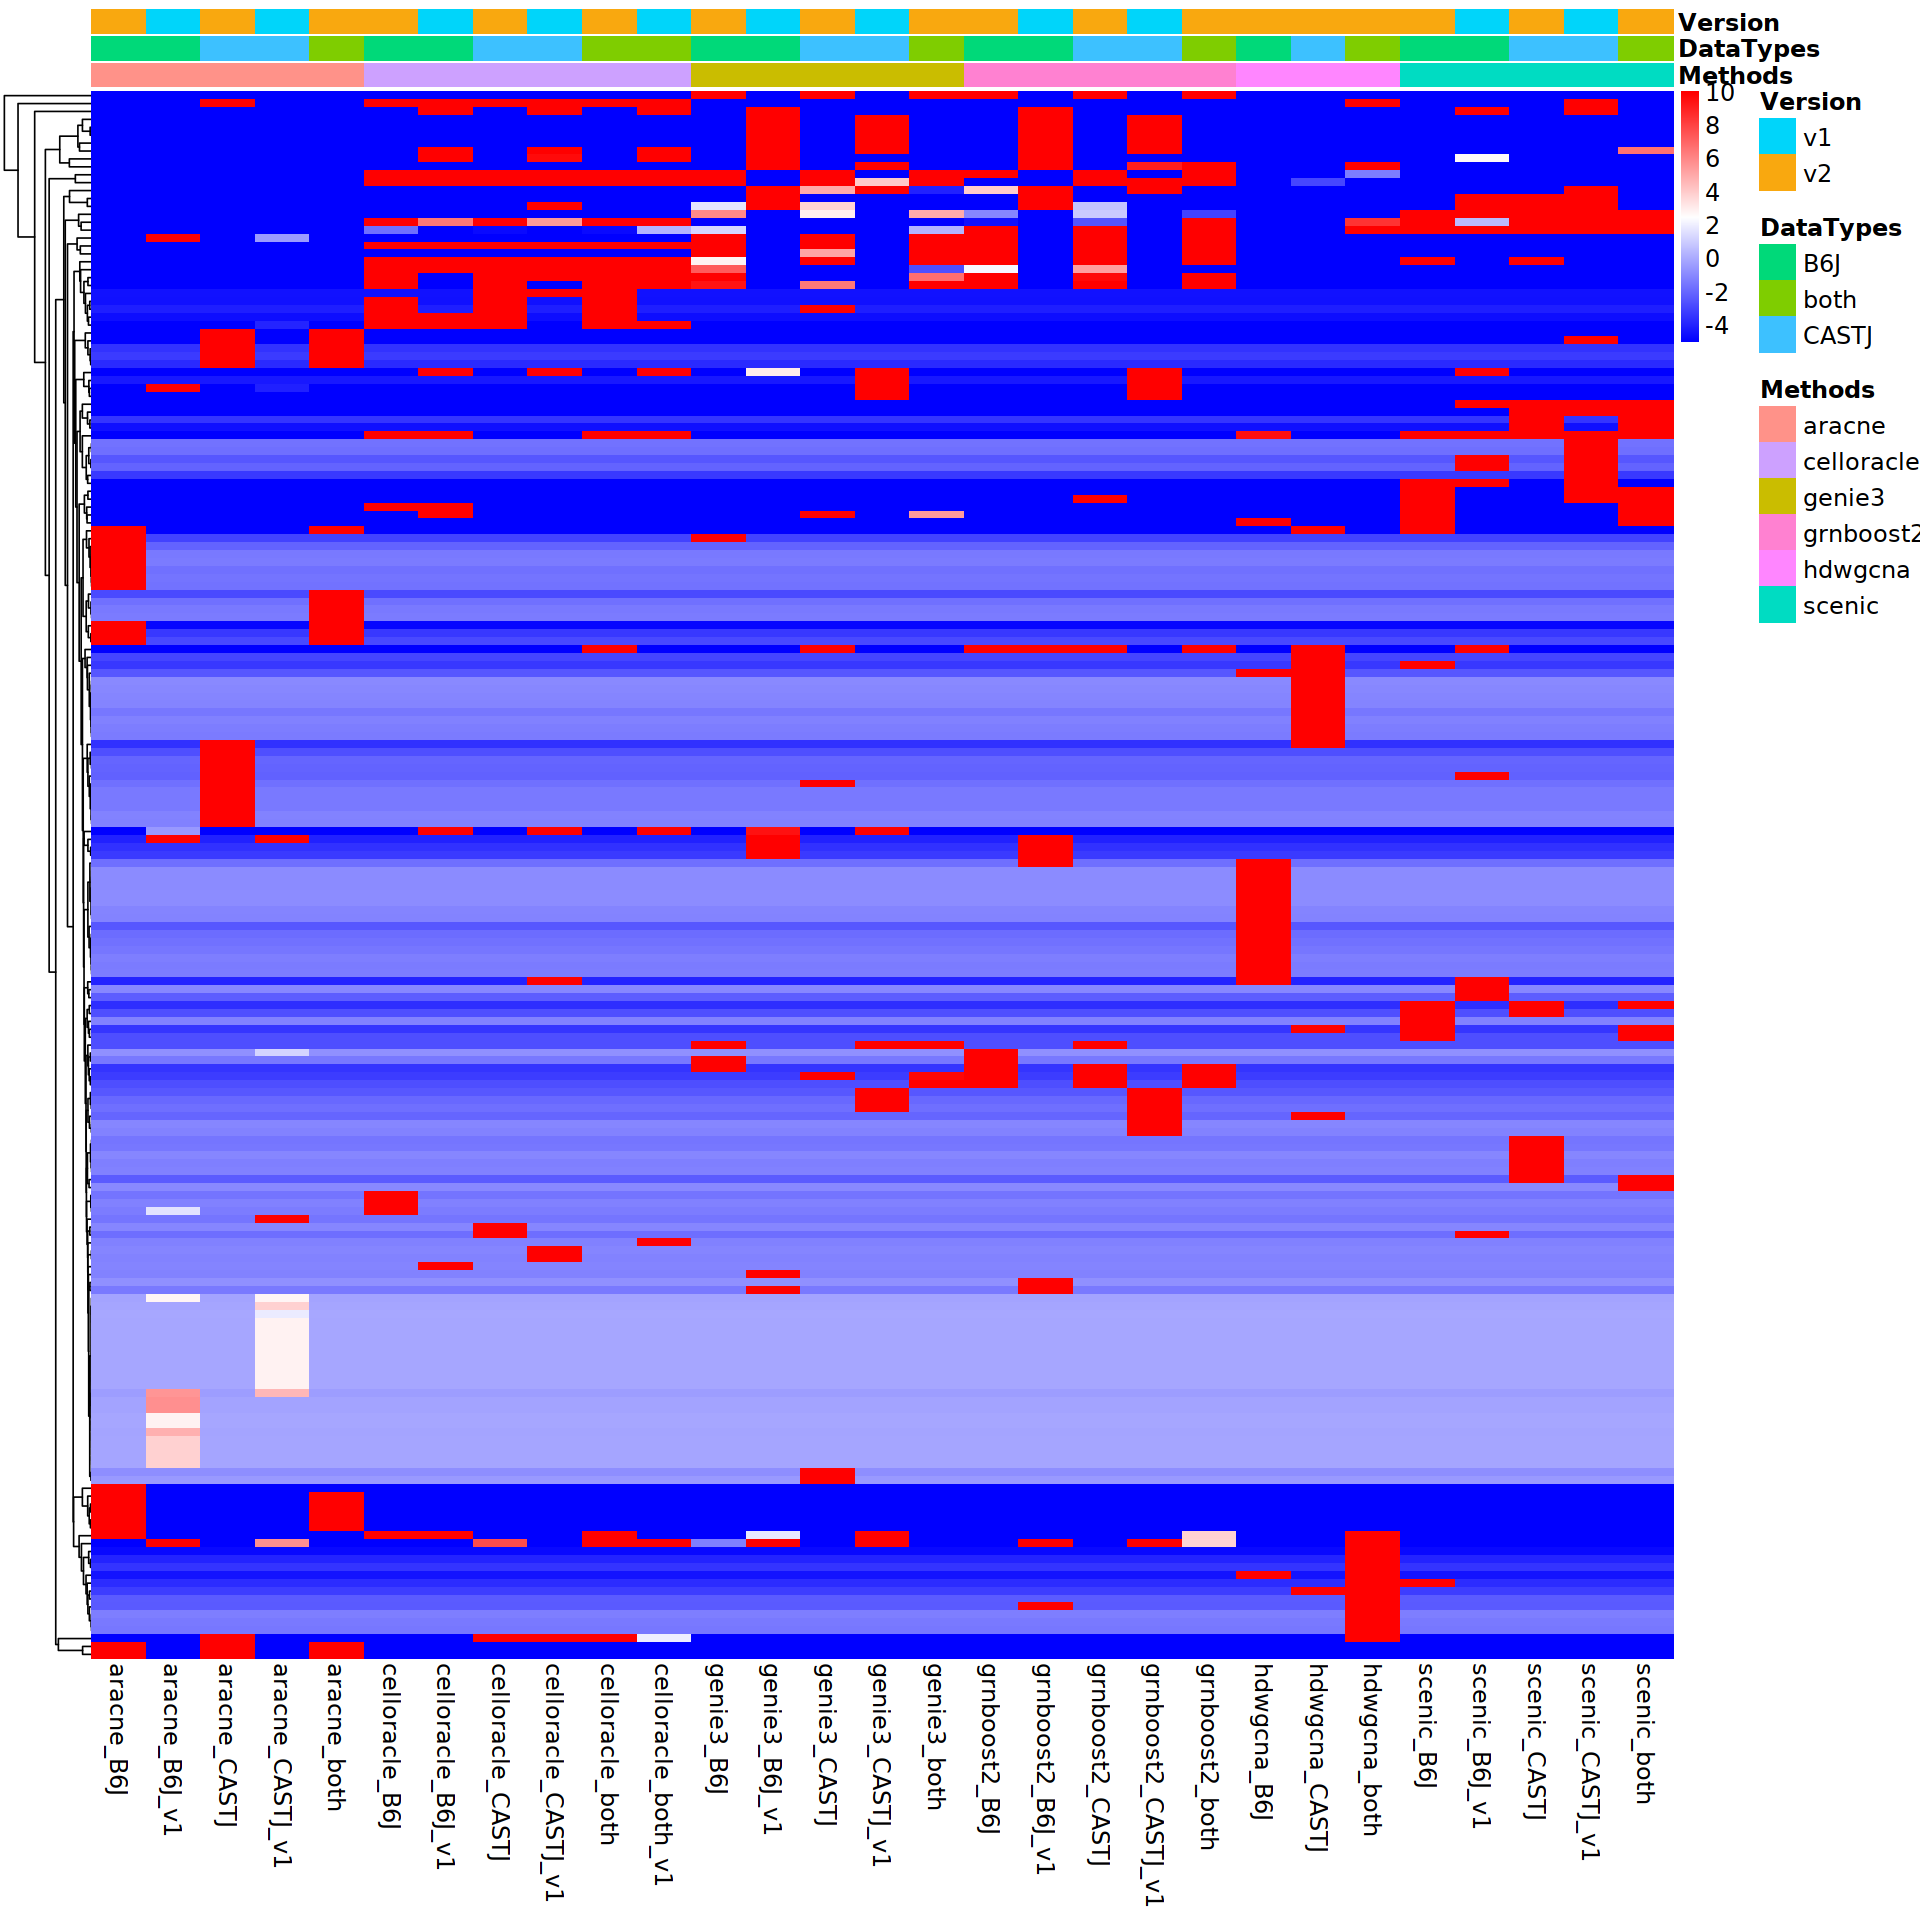

In [93]:
options(repr.plot.width = 16, repr.plot.height = 16)
pheatmap(
    plot_df, 
    fontsize=14,
    cluster_rows=TRUE, 
    show_rownames=FALSE, 
    cluster_cols=FALSE,
    annotation_col=ord_ann_col,
    color=my.colors, 
    breaks=my.breaks
)